# SEI3RDモデル
### 内部感染者をIa,Ib,Icと症状(コロナの変異株と変異前株etc）これらを三つの感染状態に分けたのがこのモデル。すでに重症化と軽症の二つの状態でのシミュレーションはQitaでも見られたため、三つの状態にした時にはどのような挙動をするのか興味を持ったため実装した。
### コロナに関してはこれからも変異が予測されるのでその都度、症状や変異株による感染力など様々な状態分岐が考えられる。

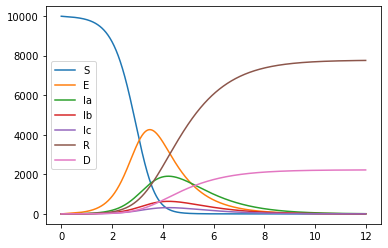

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def SEI3RD(v,t,a,b,c,d,e,f,g,h):
    dsdt = -a*v[0]*(v[2]+v[3]+v[4])
    dedt = a*v[0]*(v[2]+v[3]+v[4]) - (b+c+d)*v[1]
    #　軽症者(100%治る)
    diadt = b*v[1] - e*v[2]
    #　重傷者（50%で治り、50%で死亡）
    dibdt = c*v[1] - f*v[3] - g*v[3]
    #　重傷者(100%死亡)
    dicdt = d*v[1] - h*v[4]
    drdt = e*v[2] + f*v[3]
    dddt = g*v[3] + h*v[4]
    return [dsdt,dedt,diadt,dibdt,dicdt,drdt,dddt]

# 初期値
s0,e0,ia0,ib0,ic0,r0,d0 = (9990,0,1,4,5,0,0)
init_state = (s0,e0,ia0,ib0,ic0,r0,d0)
t = np.arange(0,12,0.01)
a=0.001
b=0.6
c=0.2
d=0.1
e=1
f=0.5
g=0.5
h=1
args=(a,b,c,d,e,f,g,h)
result = odeint(SEI3RD,init_state,t,args)
plt.plot(t,result)
plt.legend(["S","E","Ia","Ib","Ic","R","D"])


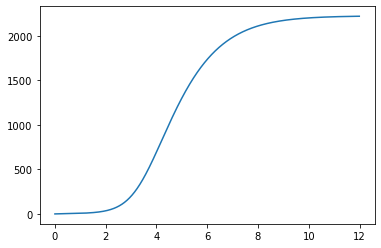

In [13]:
S = result[:,0]
E = result[:,1]
I = result[:,2]+result[:,3]+result[:,4]
R = result[:,5]
D = result[:,6]
plt.plot(t,D)

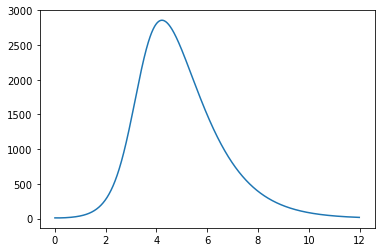

In [8]:
plt.plot(t,I)

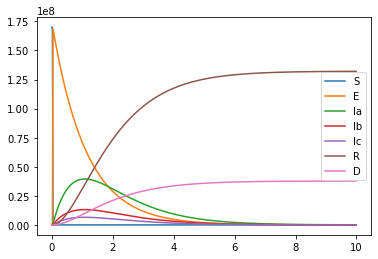

In [190]:
t = np.arange(0,10,0.01)
# a: 0.001⇨0.01
a=0.001
b=0.6
c=0.2
d=0.1
e=1
f=0.5
g=0.5
h=1
args=(a,b,c,d,e,f,g,h)
result = odeint(SEI3RD,init_state,t,args)
plt.plot(t,result)
plt.legend(["S","E","Ia","Ib","Ic","R","D"])

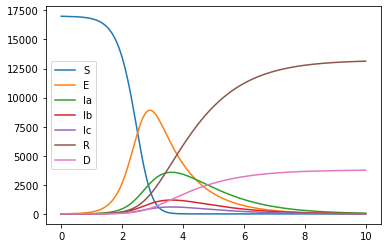

In [193]:
# 初期値
s0,e0,ia0,ib0,ic0,r0,d0 = (17000,0,1,1,2,0,0)
init_state = (s0,e0,ia0,ib0,ic0,r0,d0)
t = np.arange(0,10,0.01)
a=0.001
b=0.6
c=0.2
d=0.1
e=1
f=0.5
g=0.5
h=1
args=(a,b,c,d,e,f,g,h)
result = odeint(SEI3RD,init_state,t,args)
plt.plot(t,result)
plt.legend(["S","E","Ia","Ib","Ic","R","D"])

#### なぜか定常している

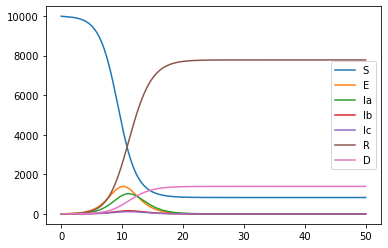

In [157]:
t = np.arange(0,50,0.01)
a=0.000543/2
b=0.7876
c=0.123
d=1-b-c
e=1
f=0.5
g=0.5
h=1
args=(a,b,c,d,e,f,g,h)
result = odeint(SEI3RD,init_state,t,args)
plt.plot(t,result)
plt.legend(["S","E","Ia","Ib","Ic","R","D"])